# **Yêu cầu: Dựa trên dữ liệu MNIST5 đã được làm quen ở bài thực hành trước. Sinh viên hãy thực hiện thao tác gom cụm bằng thuật toán k-Means. Sau đó so sánh kết quả gom cụm và nhãn lớp có sẵn của dữ liệu này**


## Tải và tiền xử lý dữ liệu MNIST5



In [10]:
import numpy as np
from sklearn.datasets import fetch_openml

print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, parser='auto')
print("MNIST dataset loaded successfully.")

X = mnist.data
y = mnist.target.astype(int)

print("Huỳnh Thị Trúc Lam - 6351071040")
print(f"Original MNIST data shape: {X.shape}")
print(f"Original MNIST target shape: {y.shape}")

Loading MNIST dataset...
MNIST dataset loaded successfully.
Huỳnh Thị Trúc Lam - 6351071040
Original MNIST data shape: (70000, 784)
Original MNIST target shape: (70000,)


In [3]:
mnist5_indices = np.where((y >= 0) & (y <= 4))
X_mnist5 = X.iloc[mnist5_indices]
y_mnist5 = y.iloc[mnist5_indices]

print(f"MNIST5 data shape: {X_mnist5.shape}")
print(f"MNIST5 target shape: {y_mnist5.shape}")

MNIST5 data shape: (35735, 784)
MNIST5 target shape: (35735,)


In [4]:
X_mnist5_normalized = X_mnist5 / 255.0

print("MNIST5 data normalized. Sample pixel value after normalization:")
print(X_mnist5_normalized.iloc[0, :5].values)

MNIST5 data normalized. Sample pixel value after normalization:
[0. 0. 0. 0. 0.]


## Thực hiện gom cụm k-Means

In [5]:
from sklearn.cluster import KMeans

print("Initializing KMeans with n_clusters=5 and random_state=42...")
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10) # Added n_init to suppress future warning

print("Fitting KMeans to the normalized MNIST5 data...")
kmeans_labels = kmeans.fit_predict(X_mnist5_normalized)

print("KMeans clustering complete. First 10 predicted labels:")
print(kmeans_labels[:10])
print(f"Shape of predicted labels: {kmeans_labels.shape}")

Initializing KMeans with n_clusters=5 and random_state=42...
Fitting KMeans to the normalized MNIST5 data...
KMeans clustering complete. First 10 predicted labels:
[4 1 0 3 0 2 0 1 2 2]
Shape of predicted labels: (35735,)


In [7]:
from sklearn import metrics

# Calculate Adjusted Rand Index (ARI)
ari = metrics.adjusted_rand_score(y_mnist5, kmeans_labels)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

# Calculate Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(y_mnist5, kmeans_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

# To better understand the mapping between clusters and true labels, we can create a confusion matrix or a mapping function.
# Let's create a function to map cluster labels to true labels based on the most frequent true label in each cluster.

def assign_cluster_labels(true_labels, cluster_labels):
    # Create a mapping from cluster ID to the most frequent true label in that cluster
    from collections import defaultdict
    cluster_to_true_label = defaultdict(lambda: defaultdict(int))

    for true_l, cluster_l in zip(true_labels, cluster_labels):
        cluster_to_true_label[cluster_l][true_l] += 1

    # Determine the best true label for each cluster
    mapping = {}
    for cluster_id, true_label_counts in cluster_to_true_label.items():
        # Find the true label with the maximum count in this cluster
        most_frequent_true_label = max(true_label_counts, key=true_label_counts.get)
        mapping[cluster_id] = most_frequent_true_label

    return mapping

# Get the mapping
cluster_label_mapping = assign_cluster_labels(y_mnist5, kmeans_labels)
print("\nMapping of KMeans cluster labels to actual MNIST5 digits:")
for cluster_id, true_label in sorted(cluster_label_mapping.items()):
    print(f"  Cluster {cluster_id} likely corresponds to digit {true_label}")

# Map the kmeans_labels to their assigned true labels for easier comparison
predicted_labels_mapped = np.array([cluster_label_mapping[label] for label in kmeans_labels])

# Calculate accuracy based on this mapping (this is not a standard clustering metric but helps interpretation)
accuracy = np.mean(predicted_labels_mapped == y_mnist5)
print(f"\nAccuracy after mapping cluster labels: {accuracy:.4f}")

Adjusted Rand Index (ARI): 0.7323
Normalized Mutual Information (NMI): 0.7099

Mapping of KMeans cluster labels to actual MNIST5 digits:
  Cluster 0 likely corresponds to digit 1
  Cluster 1 likely corresponds to digit 4
  Cluster 2 likely corresponds to digit 3
  Cluster 3 likely corresponds to digit 2
  Cluster 4 likely corresponds to digit 0

Accuracy after mapping cluster labels: 0.8810


### Trực quan hóa kết quả


Applying PCA to reduce dimensionality to 2 components...
PCA dimensionality reduction complete. Shape of X_pca:
(35735, 2)


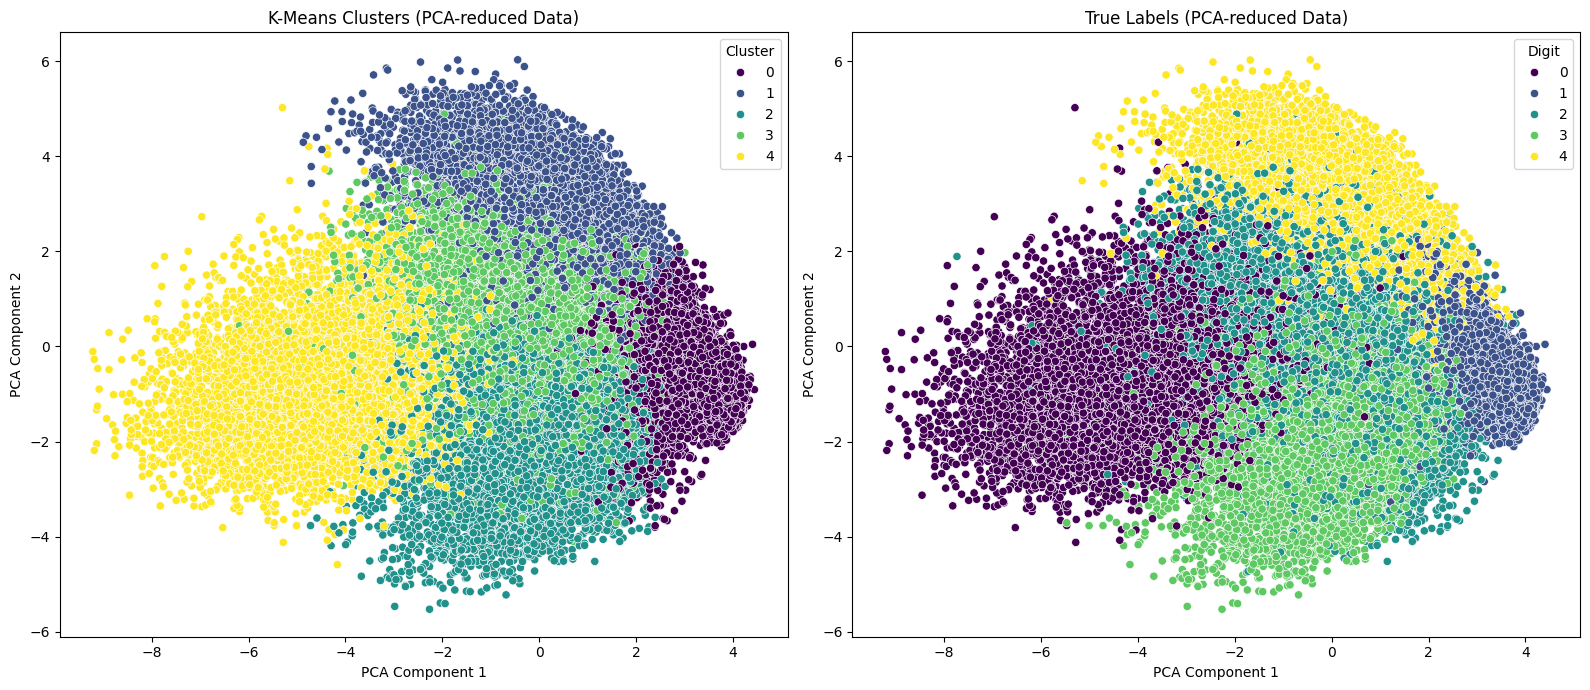

Huỳnh Thị Trúc Lam - 6351071040
Visualization of K-Means clusters and true labels using PCA complete.


In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

print("Applying PCA to reduce dimensionality to 2 components...")
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_mnist5_normalized)

print("PCA dimensionality reduction complete. Shape of X_pca:")
print(X_pca.shape)

# Create subplots for visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: K-Means Clusters
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', legend='full', ax=axes[0])
axes[0].set_title('K-Means Clusters (PCA-reduced Data)')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')
axes[0].legend(title='Cluster')

# Plot 2: True Labels
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_mnist5, palette='viridis', legend='full', ax=axes[1])
axes[1].set_title('True Labels (PCA-reduced Data)')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')
axes[1].legend(title='Digit')

plt.tight_layout()
plt.show()

print("Huỳnh Thị Trúc Lam - 6351071040")
print("Visualization of K-Means clusters and true labels using PCA complete.")